# **Pokemon Dataset API ETL**
The purpose of this Jupyter Notebook is to demonstrate an ETL process to collect data from the Pokémon API (PokéAPI). The notebook will extract Pokémon data, transform it into a dataframe, and load it into Google Drive.

## **Data Retrieval**

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define function to fetch data
def fetch_data(poke_id):

    # Define the URL for pokemon endpoint
    base_url = "https://pokeapi.co/api/v2/pokemon-species/"
    url = f'{base_url}{poke_id}'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        data = response.json()

        # Send a GET request to url
        response = requests.get(url)

        # Parse the JSON response
        data = response.json()

        # Extract output outcome
        poke_data = {
            'id' : data['id'],
            'name' : data['name'],
            'base_happiness' : data['base_happiness'],
            'capture_rate' : data['capture_rate'],
            'forms_switchable' : data['forms_switchable'],
            'gender_rate' : data['gender_rate'],
            'habitat_name' : data['habitat']['name'] if data['habitat'] else None,
            'has_gender_differences' : data['has_gender_differences'],
            'hatch_count' : data['hatch_counter'],
            'is_baby' : data['is_baby'],
            'is_legendary' : data['is_legendary'],
            'is_mythical' : data['is_mythical'],
            'shape_name' : data['shape']['name'] if data['shape'] else None,
            'growth_rate' : data['growth_rate']['name'] if data['growth_rate'] else None
        }

        print(f"Fetched data for Pokemon ID {poke_id}: {poke_data}")  # Debugging line
        return poke_data
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred for ID {poke_id}: {http_err}")
    except Exception as err:
        print(f"Other error occurred for ID {poke_id}: {err}")
    return None

In [2]:
# define function to fetch data based on index
def fetch_data_range(start, end):
    poke_data_search = []

    for poke_id in range (start, end + 1):
        data = fetch_data(poke_id)
        if data:
            poke_data_search.append(data)

    return pd.DataFrame(poke_data_search)

In [3]:
# define start and end
start = 1
end = 500

df_pokemon = fetch_data_range(start, end)

Fetched data for Pokemon ID 1: {'id': 1, 'name': 'bulbasaur', 'base_happiness': 50, 'capture_rate': 45, 'forms_switchable': False, 'gender_rate': 1, 'habitat_name': 'grassland', 'has_gender_differences': False, 'hatch_count': 20, 'is_baby': False, 'is_legendary': False, 'is_mythical': False, 'shape_name': 'quadruped', 'growth_rate': 'medium-slow'}
Fetched data for Pokemon ID 2: {'id': 2, 'name': 'ivysaur', 'base_happiness': 50, 'capture_rate': 45, 'forms_switchable': False, 'gender_rate': 1, 'habitat_name': 'grassland', 'has_gender_differences': False, 'hatch_count': 20, 'is_baby': False, 'is_legendary': False, 'is_mythical': False, 'shape_name': 'quadruped', 'growth_rate': 'medium-slow'}
Fetched data for Pokemon ID 3: {'id': 3, 'name': 'venusaur', 'base_happiness': 50, 'capture_rate': 45, 'forms_switchable': True, 'gender_rate': 1, 'habitat_name': 'grassland', 'has_gender_differences': True, 'hatch_count': 20, 'is_baby': False, 'is_legendary': False, 'is_mythical': False, 'shape_name'

In [4]:
df_pokemon.head()

,id,name,base_happiness,capture_rate,forms_switchable,gender_rate,habitat_name,has_gender_differences,hatch_count,is_baby,is_legendary,is_mythical,shape_name,growth_rate
0,1,bulbasaur,50,45,False,1,grassland,False,20,False,False,False,quadruped,medium-slow
1,2,ivysaur,50,45,False,1,grassland,False,20,False,False,False,quadruped,medium-slow
2,3,venusaur,50,45,True,1,grassland,True,20,False,False,False,quadruped,medium-slow
3,4,charmander,50,45,False,1,mountain,False,20,False,False,False,upright,medium-slow
4,5,charmeleon,50,45,False,1,mountain,False,20,False,False,False,upright,medium-slow


## **Data Exploration**

Column Details:
| **Name** | **Description** | **Type** |
| --- | --- | --- |
| id | The identifier for this resource. | integer |
| name | The name for this resource. | string |
| base_happiness | The happiness when caught by a normal Pokéball; up to 255. The higher the number, the happier the Pokémon. | integer |
| capture_rate | The base capture rate; up to 255. The higher the number, the easier the catch. | integer |
| forms_switchable | Whether or not this Pokémon has multiple forms and can switch between them. | boolean |
| gender_rate	| The chance of this Pokémon being female, in eighths; or -1 for genderless. | integer |
| habitat_name | The habitat this Pokémon species can be encountered in. | string |
| has_gender_differences | Whether or not this Pokémon has visual gender differences. | boolean |
| hatch_count | Initial hatch counter: one must walk Y × (hatch_counter + 1) steps before this Pokémon's egg hatches, unless utilizing bonuses like Flame Body's. Y varies per generation. In Generations II, III, and VII, Egg cycles are 256 steps long. In Generation IV, Egg cycles are 255 steps long. In Pokémon Brilliant Diamond and Shining Pearl, Egg cycles are also 255 steps long, but are shorter on special dates. In Generations V and VI, Egg cycles are 257 steps long. In Pokémon Sword and Shield, and in Pokémon Scarlet and Violet, Egg cycles are 128 steps long. | integer |
| is_baby	| Whether or not this is a baby Pokémon. | boolean |
| is_legendary | Whether or not this is a legendary Pokémon. | boolean |
| is_mythical	| Whether or not this is a mythical Pokémon. | boolean |
| shape_name | The shape of this Pokémon for Pokédex search. | string |
| growth_rate | The rate at which this Pokémon species gains levels.| string |

In [5]:
# check info on each features
list_features = []

for col in df_pokemon.columns:
    list_features.append([col, df_pokemon[col].dtype, df_pokemon[col].isna().sum(), round((df_pokemon[col].isna().sum()/len(df_pokemon[col]))*100, 2),
                    df_pokemon[col].nunique(), list(df_pokemon[col].drop_duplicates().sample(2).values)]);

df_pokemon_info = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=list_features)
df_pokemon_info

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.0,500,"[37, 240]"
1,name,object,0,0.0,500,"[shedinja, paras]"
2,base_happiness,int64,0,0.0,7,"[70, 140]"
3,capture_rate,int64,0,0.0,28,"[130, 190]"
4,forms_switchable,bool,0,0.0,2,"[False, True]"
5,gender_rate,int64,0,0.0,7,"[2, 8]"
6,habitat_name,object,114,22.8,9,"[rare, None]"
7,has_gender_differences,bool,0,0.0,2,"[False, True]"
8,hatch_count,int64,0,0.0,10,"[10, 15]"
9,is_baby,bool,0,0.0,2,"[True, False]"


In [6]:
missing_values = df_pokemon[df_pokemon['habitat_name'].isnull()]
missing_values.head()

,id,name,base_happiness,capture_rate,forms_switchable,gender_rate,habitat_name,has_gender_differences,hatch_count,is_baby,is_legendary,is_mythical,shape_name,growth_rate
386,387,turtwig,70,45,False,1,None,False,20,False,False,False,quadruped,medium-slow
387,388,grotle,70,45,False,1,None,False,20,False,False,False,quadruped,medium-slow
388,389,torterra,70,45,False,1,None,False,20,False,False,False,quadruped,medium-slow
389,390,chimchar,70,45,False,1,None,False,20,False,False,False,upright,medium-slow
390,391,monferno,70,45,False,1,None,False,20,False,False,False,upright,medium-slow


Text(0.5, 0, 'Capture Rate')

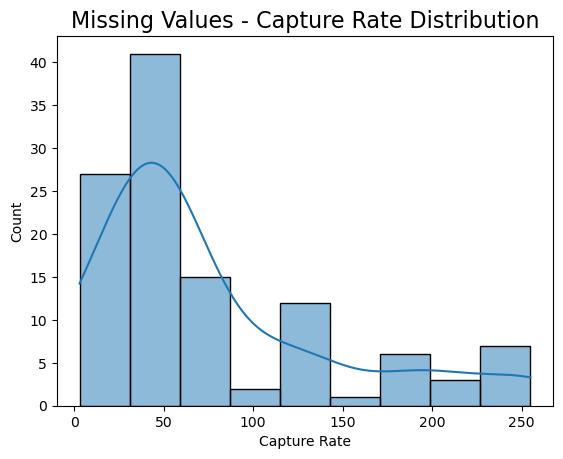

In [7]:
plt.title('Missing Values - Capture Rate Distribution', size = 16)
sns.histplot(data=missing_values, x='capture_rate', kde=True)
plt.xlabel('Capture Rate')

Insight:
- Capture Rate distribution is right-skewed, with most of the numbers are dominated by low value capture rate (hard to capture.)

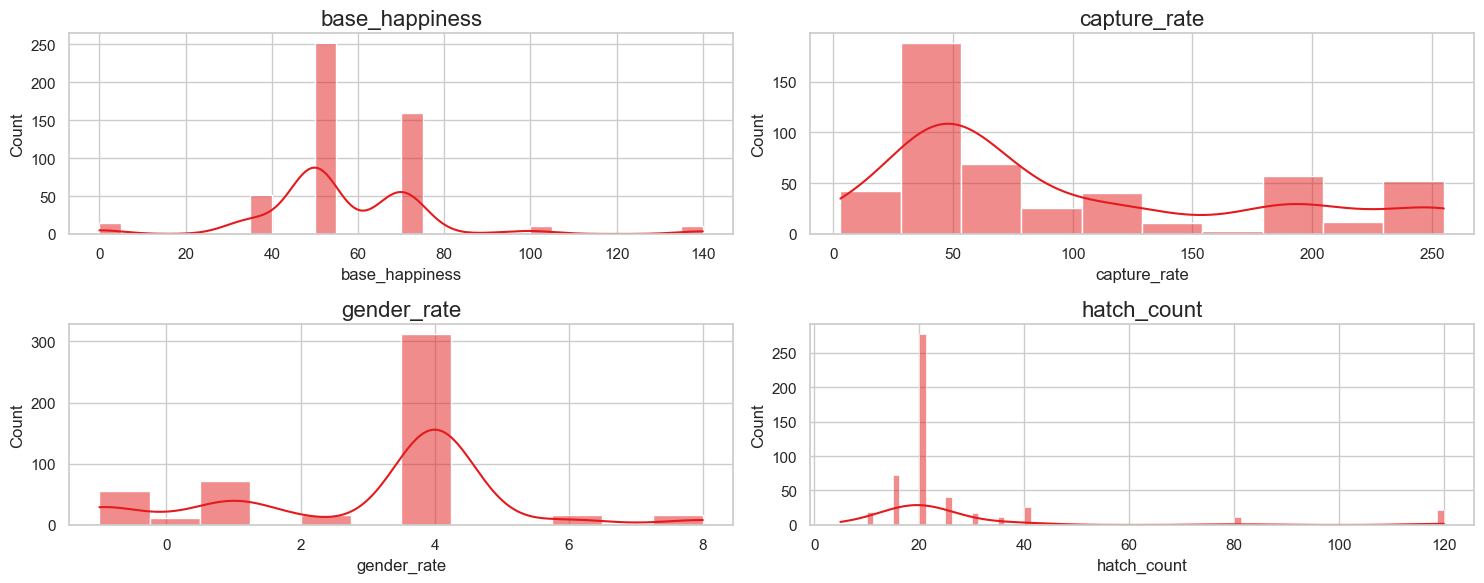

In [8]:
# check data distribution of each columns
num_features = df_pokemon.drop(columns='id').describe().columns

plt.figure(figsize=(15,6), facecolor='white')
sns.set(style='whitegrid', palette='Set1')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(x=feature, data=df_pokemon, kde=True);
    plt.title(feature, size=16)
    plt.tight_layout()
    plotnumber += 1

plt.show()

Insight:
- Numerical data is not normally distributed

In [11]:
# check univariate statistics for numerical columns : spearman correlation for data which is not normally distributed
df_pokemon_corr = df_pokemon.drop(columns='id').corr(method = 'spearman', numeric_only = True)
df_pokemon_corr

,base_happiness,capture_rate,forms_switchable,gender_rate,has_gender_differences,hatch_count,is_baby,is_legendary,is_mythical
base_happiness,1.000000,0.215488,-0.171994,0.175118,0.056655,-0.354831,-0.020149,-0.181640,0.079732
capture_rate,0.215488,1.000000,-0.265514,0.431685,0.043335,-0.501215,0.081670,-0.377634,-0.193826
forms_switchable,-0.171994,-0.265514,1.000000,-0.077551,0.030478,0.176372,-0.067242,0.121661,0.088371
gender_rate,0.175118,0.431685,-0.077551,1.000000,0.152974,-0.388975,0.064433,-0.326531,-0.253847
has_gender_differences,0.056655,0.043335,0.030478,0.152974,1.000000,-0.171366,-0.092985,-0.112693,-0.068739
hatch_count,-0.354831,-0.501215,0.176372,-0.388975,-0.171366,1.000000,0.024144,0.381184,0.204901
is_baby,-0.020149,0.081670,-0.067242,0.064433,-0.092985,0.024144,1.000000,-0.045260,-0.027607
is_legendary,-0.181640,-0.377634,0.121661,-0.326531,-0.112693,0.381184,-0.045260,1.000000,-0.033458
is_mythical,0.079732,-0.193826,0.088371,-0.253847,-0.068739,0.204901,-0.027607,-0.033458,1.000000


<Axes: title={'center': 'Correlation Heatmap of Numerical Features'}>

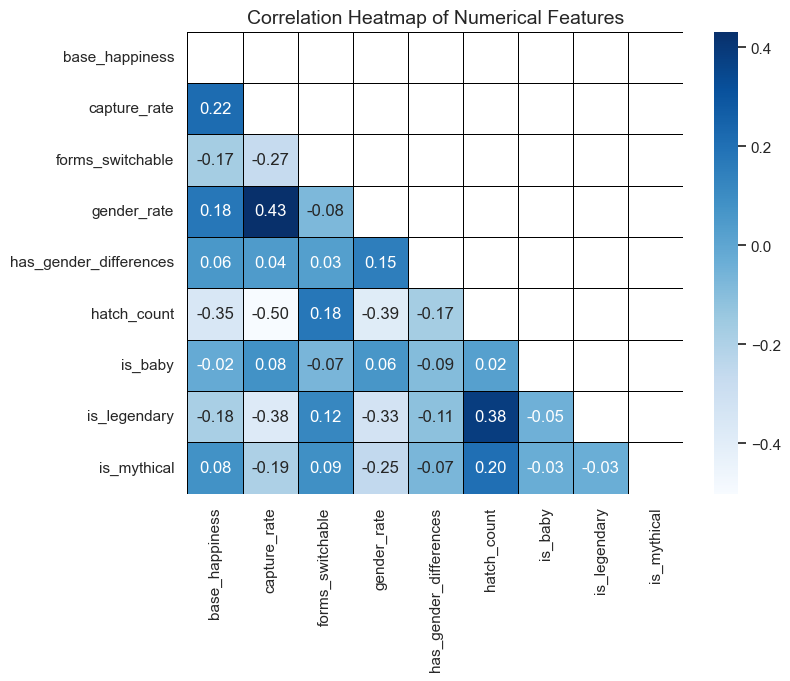

In [12]:
# correlation visulization
plt.figure(figsize = (8,6))
sns.set(style='white')
plt.title('Correlation Heatmap of Numerical Features', size = 14)
sns.heatmap(data=df_pokemon_corr,
            annot=True,
            cmap = 'Blues',
            fmt = '.2f',
            linewidths=0.5,
            mask=np.triu(df_pokemon_corr),
            linecolor='black')

Insight:
> Based on its correlation, **base_happiness**, **forms_switchable**, **gender_rate**, **hatch_count**, **is_legendary**, **is_mythical** have correlation value > 0.2 which describes a moderate correlation.

> Two columns **has_gender_differences** and **is_baby** have a very weak correlation.

In [13]:
def conclusion(pvalue, column1, column2):
    if pvalue > 0.05:
        print(f'''Pvalue {pvalue} > 0.05. Failed to reject Ho 
            Column {column1} doesn't have any relation to columns {column2}.''')
    else:
        print(f'''Pvalue {pvalue} < 0.05. Succeeded to reject Ho
            Column {column1} has significant relation to {column2}.''')

In [14]:
# check univariate statistics for categorical columns: chi-squared test
from scipy.stats import chi2_contingency

# pivot categorical columns
df_chi1 = df_pokemon.pivot_table(columns='growth_rate',
                       index='shape_name',
                       values='name',
                       aggfunc='count')

df_chi2 = df_pokemon.pivot_table(columns='growth_rate',
                       index='habitat_name',
                       values='name',
                       aggfunc='count')

df_chi3 = df_pokemon.pivot_table(columns='shape_name',
                       index='habitat_name',
                       values='name',
                       aggfunc='count')

# fill NaN values with 0
df_chi1.fillna(0, inplace=True)
df_chi2.fillna(0, inplace=True)
df_chi3.fillna(0, inplace=True)

# check pvalue
stats, pvalue1, dof, expfreq = chi2_contingency(df_chi1)
stats, pvalue2, dof, expfreq = chi2_contingency(df_chi2)
stats, pvalue3, dof, expfreq = chi2_contingency(df_chi3)

# conclusion
conclusion(pvalue1, 'growth_rate', 'shape_name')
conclusion(pvalue2, 'growth_rate', 'habitat_name')
conclusion(pvalue3, 'shape_name', 'habitat_name')

Pvalue 3.546691713863954e-08 < 0.05. Succeeded to reject Ho
            Column growth_rate has significant relation to shape_name.
Pvalue 2.428602049510763e-08 < 0.05. Succeeded to reject Ho
            Column growth_rate has significant relation to habitat_name.
Pvalue 4.069358802310623e-37 < 0.05. Succeeded to reject Ho
            Column shape_name has significant relation to habitat_name.


## **Drop Columns**

Based on the correlations, the columns `is_baby` and `has_gender_differences` have a very weak correlation with other numerical columns. This aligns with in-game knowledge: 

- `has_gender_differences` indicates different forms of male and female Pokémon species, which is only important for collectors and does not significantly impact gameplay mechanics. 
- `is_baby` indicates whether the Pokémon is a baby; however, the only difference between baby and unevolved Pokémon is lower base stats, with no significant privilege, and they are still considered unevolved forms. 

Therefore the columns are dropped.

In [15]:
df_pokemon.drop(columns=['has_gender_differences', 'is_baby'], inplace=True)

## **Data Load**

In [9]:
from oauth2client.service_account import ServiceAccountCredentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

# Path to your service account key file
SERVICE_ACCOUNT_FILE = 'extract-transform-load-433307-594a2d6d68e8.json'

# Define the required scopes
SCOPES = ['https://www.googleapis.com/auth/drive']

# Authenticate and create the service
credentials = ServiceAccountCredentials.from_json_keyfile_name(SERVICE_ACCOUNT_FILE, SCOPES)
service = build('drive', 'v3', credentials=credentials)

# Define the file metadata
file_metadata = {
    'name': 'pokemon_etl.csv',  # Name of the file on Google Drive
    'parents' : ['1_W6Ez4GH0LhezUYd7dzcwg-3sI9ayXy8']
}

# Path to the CSV file you want to upload
file_path = 'pokemon_etl.csv'

# Create MediaFileUpload object
media = MediaFileUpload(file_path, mimetype='text/csv')

# Upload the file
try:
    file = service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id, name, mimeType, parents'
    ).execute()
    print(f"File '{file.get('name')}' uploaded successfully with ID: {file.get('id')}")
except Exception as e:
    print(f"An error occurred during file upload: {e}")

File 'pokemon_etl.csv' uploaded successfully with ID: 1RV85gxrDt3oSaJmurKj-NUevuIybX_zV
